# Analisis de tokens

# Análisis varios para el proyecto

In [40]:
import pandas as pd
from ETL import get_data, count_tokens, process_user_data, process_vacancies_data
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np 
from matplotlib.colors import LinearSegmentedColormap
from wordcloud import WordCloud
from collections import Counter
from langdetect import detect
import fasttext
import re
from gensim.models import Word2Vec
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.manifold import TSNE

mpl.rc("text", usetex=True)
mpl.rc("font", **{"family":"serif", "serif":["Computer Modern"]})

In [2]:
# Lectura de datos 
data_users = get_data("raw/users.csv", "users")
data_vacancies = get_data("raw/vacantes.csv", "vacancies")

# Preprocesamiento 
data_users = process_user_data(data_users)
data_vacancies = process_vacancies_data(data_vacancies)

print(f"tamaños de la base de usuarios = {data_users.shape}")
print(data_users.columns)
print(f"tamaños de la base de vacantes = {data_vacancies.shape}")
print(data_vacancies.columns)

tamaños de la base de usuarios = (887, 7)
Index(['id usuario', 'idioma', 'aspiracion salarial', 'idioma',
       'años experiencia', 'nombre cargo deseado', 'habilidades'],
      dtype='object')
tamaños de la base de vacantes = (4815, 8)
Index(['id trabajo', 'area', 'modalidad de trabajo', 'pais', 'ciudad',
       'remoto', 'nombre vacante', 'descripcion'],
      dtype='object')


In [42]:
data_usuarios = pd.read_csv("users.csv")

data_usuarios = data_usuarios.rename(columns={
    "id_user":"id usuario",
    "country":"pais",
    "degrees":"grados",
    "wage_aspiration":"aspiracion salarial",
    "currency":"moneda",
    "current_wage":"salario actual",
    "change_cities":"cambio ciudad",
    "language":"idioma",
    "years_experience":"años experiencia",
    "months_experience":"meses experiencia",
    "wish_role_name":"nombre cargo deseado",
    "work_modality":"modalidad de trabajo",
    "hardskills":"habilidades"
})

data_usuarios['area'] = data_usuarios['area'].replace('GERENCIA DE PROYECTOS CONSULTORIA', 'G PROYECTOS')
data_usuarios['area'] = data_usuarios['area'].replace('FINANZAS Y CONTABILIDAD', 'CONTABILIDAD')
data_usuarios['area'] = data_usuarios['area'].replace('VENTAS COMERCIAL', 'VENTAS')
data_usuarios['area'] = data_usuarios['area'].replace('RECURSOS HUMANOS', 'R. HUMANOS')
data_usuarios

,id usuario,pais,area,subareas,grados,aspiracion salarial,moneda,salario actual,cambio ciudad,idioma,años experiencia,meses experiencia,nombre cargo deseado,modalidad de trabajo,habilidades
0,1,Colombia,CALIDAD,NaN,NaN,4500000.0,COP,3800000.0,NaN,INGLÉS B2 - INTERMEDIO ALTO,4.0,NaN,NaN,Tiempo completo,"CALIDAD,GESTIÓN DE CALIDAD,MEJORA CONTINUA,MEJ..."
1,2,Colombia,DISEÑO,NaN,NaN,2800000.0,COP,1600000.0,NaN,INGLÉS C1 - AVANZADO,1.0,3.0,NaN,Tiempo completo,"DISEÑO GRÁFICO,DISEÑO DE MARCA,DISEÑO,ADOBE IL..."
2,3,Colombia,TECNOLOGÍA,NaN,NaN,7000000.0,COP,5000000.0,NaN,INGLÉS B2 - INTERMEDIO ALTO,10.0,NaN,NaN,Medio tiempo,"ADOBE CREATIVE SUITE,FIGMA,WEB DESIGN,WORDPRES..."
3,4,Colombia,VENTAS,NaN,NaN,7000000.0,COP,5000000.0,NaN,INGLÉS B1 - INTERMEDIO,10.0,NaN,NaN,Indiferente,EXCELENTE RELACIONAMIENTO CON MI NICHO DE MERC...
4,5,Colombia,TECNOLOGÍA,NaN,NaN,5000000.0,COP,3400000.0,NaN,INGLÉS B1 - INTERMEDIO,4.0,6.0,NaN,Medio tiempo,"DISEÑO DE PRODUCTO,ESTRATEGIA OMNICANAL,ESTRAT..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1214,1215,Colombia,R. HUMANOS,"GESTIÓN HUMANA,HRBP/GENERALISTA",NaN,6500000.0,COP,NaN,"MEDELLIN,CARTAGENA,SANTA MARTA,BARRANQUILLA",INGLÉS A1 - BÁSICO,8.0,NaN,"COORDINADOR DE RECURSOS HUMANOS,COORDINADOR DE...",Medio tiempo,"PHOTOSHOP,ADOBE ILLUSTRATOR,WORDPRESS,MICROSOF..."
1215,1216,Colombia,R. HUMANOS,"GESTIÓN HUMANA,SG-SST",NaN,4000000.0,COP,NaN,NaN,INGLÉS A2 - PRE INTERMEDIO,7.0,NaN,"ESPECIALISTA RECURSOS HUMANOS,COORDINADOR DE T...",Indiferente,"BIENESTAR,SELECCIÓN ,CONTRATACIÓN ,SG-SST,INDI..."
1216,1217,Colombia,R. HUMANOS,"GESTIÓN HUMANA,NOMINA",NaN,3000000.0,COP,NaN,NaN,INGLÉS B1 - INTERMEDIO,2.0,4.0,"ANALISTA DE GESTIÓN HUMANA,ANALISTA DE COMPENS...",Indiferente,"COMPENSACIÓN Y BENEFICIOS,AFILIACIONES SEGURID..."
1217,1218,Colombia,R. HUMANOS,"GESTIÓN HUMANA,NOMINA",NaN,2200000.0,COP,NaN,NaN,INGLÉS B1 - INTERMEDIO,3.0,NaN,"ASISTENTE ADMINISTRATIVO,ANALISTA ADMINISTRATIVA",Tiempo completo,"MICROSOFT EXCEL,BIZAGI"


## Diagrama de torta de páis

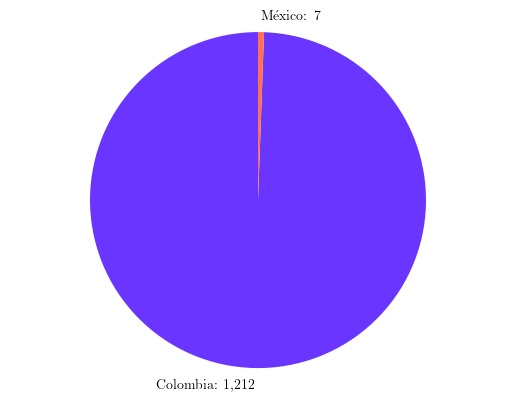

In [43]:

colombia = data_usuarios["pais"].value_counts()[0]
mexico = data_usuarios["pais"].value_counts()[1]
total = len(data_usuarios)
directo_pct = round(colombia / total * 100, 1)
indirecto_pct = round(mexico / total * 100, 1)
directo_label = f'Colombia: {colombia:,}'
indirecto_label = f'México: {mexico:,}'

fig, ax = plt.subplots()
colors = ["#6a36ff","#ff7150"]
ax.pie(
    [colombia, mexico], 
    labels=[directo_label, indirecto_label], 
    colors = colors,
    # autopct='%1.1f%%', 
    startangle=90)
ax.axis('equal')

plt.savefig("pais.png", dpi=300, transparent=True)
plt.show()

## Histograma de áreas

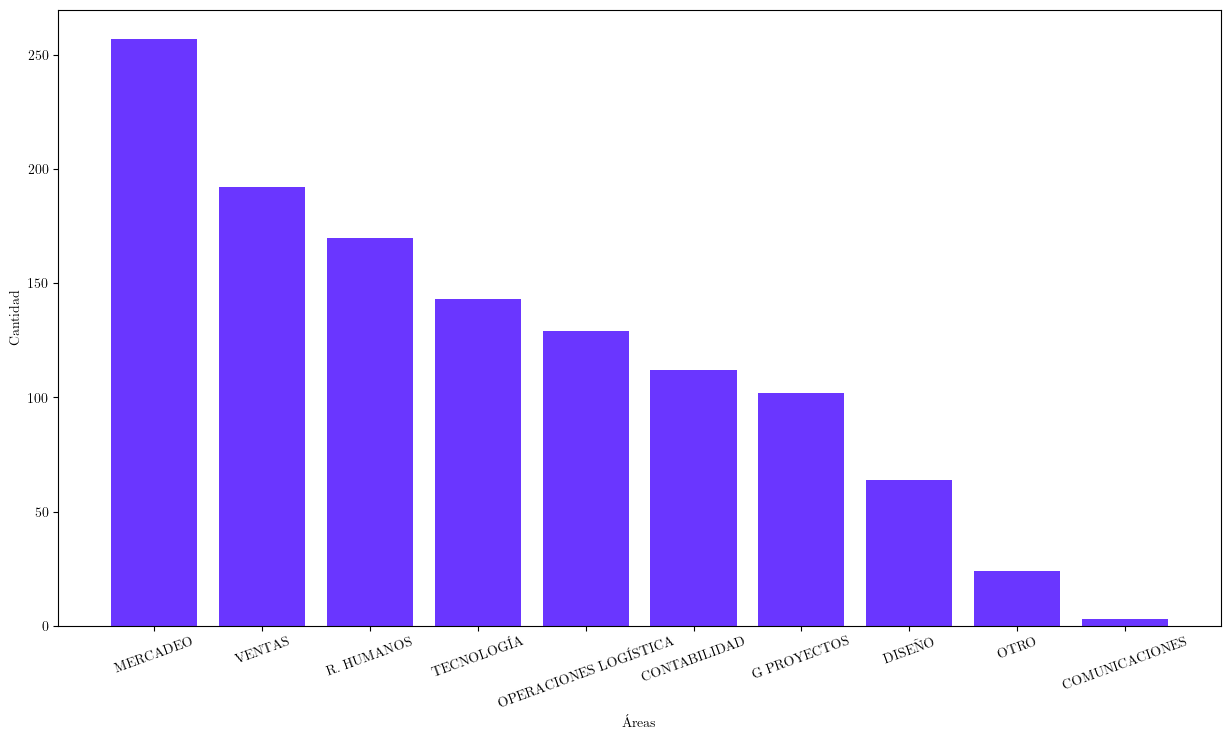

In [44]:
bins = [0,1,2,3,4,5,6,7,8]
mask = data_usuarios["pais"] == "Colombia" 
datos_colombia = data_usuarios[mask]
conteo_area = datos_colombia["area"].value_counts().sort_values(ascending=False)[:10]

# Crear gráfico de barras
fig, ax = plt.subplots(figsize=(15, 8))  # Ajusta el tamaño de la figura aquí
ax.bar(conteo_area.index, conteo_area.values, width=0.8, color="#6a36ff")  # Puedes ajustar el valor de width según necesites


plt.xlabel("Áreas")
plt.ylabel("Cantidad")
plt.xticks(rotation=20)
plt.savefig("area.png", dpi=300, transparent=True)


## Correlacion variables numpericas

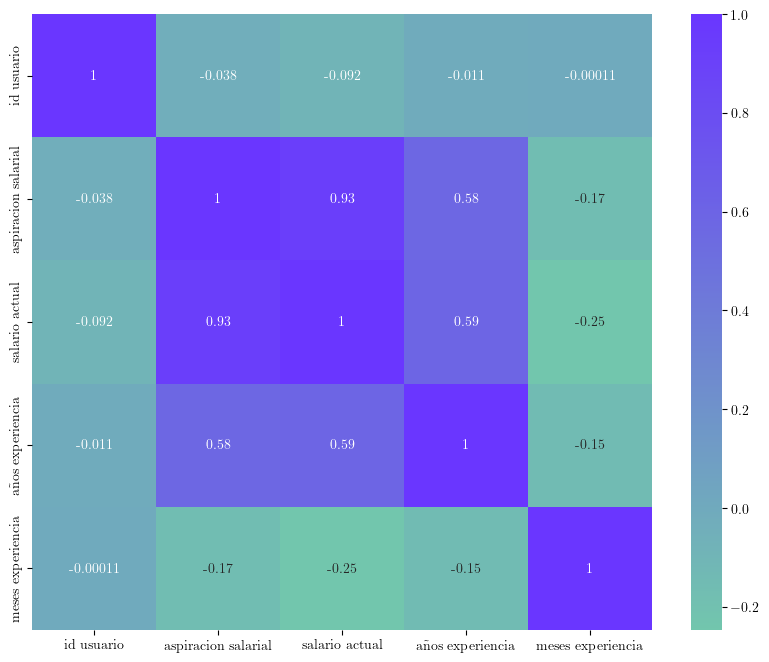

In [45]:
columnas_numericas = data_usuarios.select_dtypes(include=[np.number])

# Calcula la matriz de correlación
correlacion = columnas_numericas.corr()

# Crear una figura
plt.figure(figsize=(10,8))
cmap = LinearSegmentedColormap.from_list("mycmap", ["#72c6ad", "#6a36ff"])

# Genera el mapa de calor
sns.heatmap(correlacion, annot=True, cmap=cmap)

# Muestra la figura
plt.savefig("correlacion.png", dpi=300, transparent=True)
plt.show()

## Diagrama de caja para idiomas

/var/folders/5l/049wyphs4qq6w8rth15_rf0m0000gn/T/ipykernel_59878/1927144952.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_usuarios_filtrados = data_usuarios[data_usuarios["moneda"]=="COP"][data_usuarios['idioma'].isin(idiomas_seleccionados)]


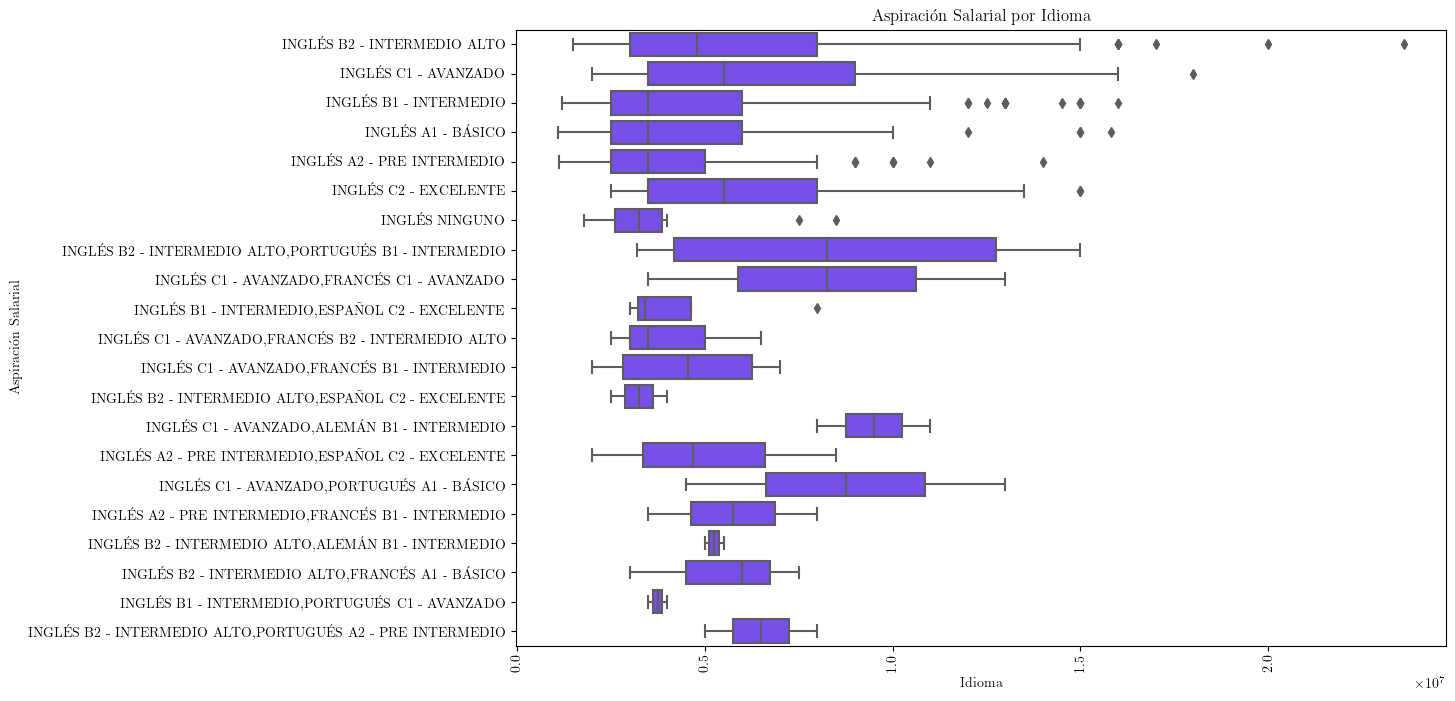

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
iqr = data_usuarios[data_usuarios["moneda"]=="COP"].groupby('idioma')['aspiracion salarial'].apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
umbral = 10000  # Define tu propio umbral
idiomas_seleccionados = iqr[iqr > umbral].index
data_usuarios_filtrados = data_usuarios[data_usuarios["moneda"]=="COP"][data_usuarios['idioma'].isin(idiomas_seleccionados)]
cmap = sns.light_palette("#6a36ff", as_cmap=True)


plt.figure(figsize=(12,8))
sns.boxplot(x='aspiracion salarial', y='idioma',orient="h", data=data_usuarios_filtrados,color="#6a36ff")
plt.title('Aspiración Salarial por Idioma')
plt.xlabel('Idioma')
plt.ylabel('Aspiración Salarial')
plt.xticks(rotation=90)
plt.savefig("salario_idioma.png", dpi=300, transparent=True)

plt.show()

## Nubes de palabras

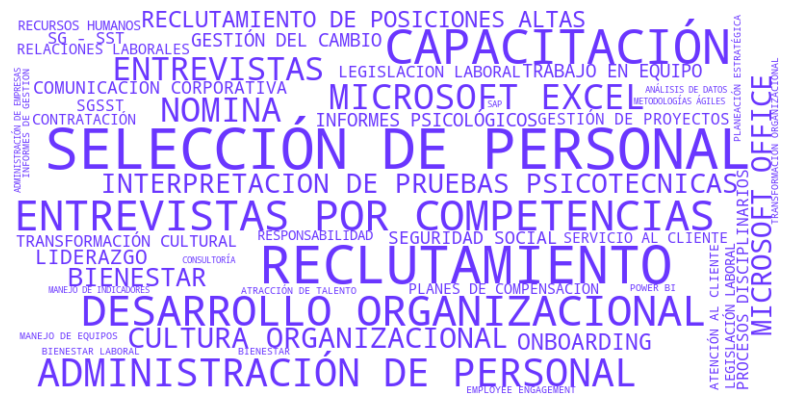

In [47]:
habilidades = data_usuarios[data_usuarios["area"]=="R. HUMANOS"]["habilidades"].dropna()
# habilidades = data_usuarios["habilidades"].dropna()
habilidades = habilidades.str.split(",", expand=True).stack()

contador_habilidades = Counter(habilidades)

def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "#6a36ff"

wc = WordCloud(width=800, height=400, max_words=50, background_color="white", color_func=color_func).generate_from_frequencies(contador_habilidades)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

## Detección de idioma en descripcion de vacante

In [49]:
data_vacantes = pd.read_csv("vacantes.csv")

data_vacantes = data_vacantes.rename(columns={
    "account executive":"cuenta ejecutivo",
    "work_modality": "modalidad de trabajo",
    "country":"pais",
    "city":"ciudad",
    "remote":"remoto",
    "vacancy_name":"nombre vacante",
    "description":"descripcion"
})

model = fasttext.load_model("lid.176.bin")

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\([^)]*\)', '', text)  
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.replace('\n', ' ')
    return  text

def detect_language(text):
    predictions = model.predict(text, k=1)
    language = predictions[0][0].replace("__label__", "")
    return language

data_vacantes["descripcion"] = data_vacantes["descripcion"].apply(clean_text)
data_vacantes["Idioma"] = data_vacantes["descripcion"].apply(detect_language)
data_vacantes["Idioma"] = data_vacantes["Idioma"].replace('es', 'Español')
data_vacantes["Idioma"] = data_vacantes["Idioma"].replace('en', 'Inglés')
data_vacantes["Idioma"] = data_vacantes["Idioma"].replace('fr', 'Francés')
data_vacantes["Idioma"] = data_vacantes["Idioma"].replace('pt', 'Portugués')
data_vacantes["Idioma"] = data_vacantes["Idioma"].replace('de', 'Alemán')
data_vacantes["Idioma"] = data_vacantes["Idioma"].replace('tr', 'Turco')
data_vacantes["Idioma"] = data_vacantes["Idioma"].replace('nl', 'Neerlandés')

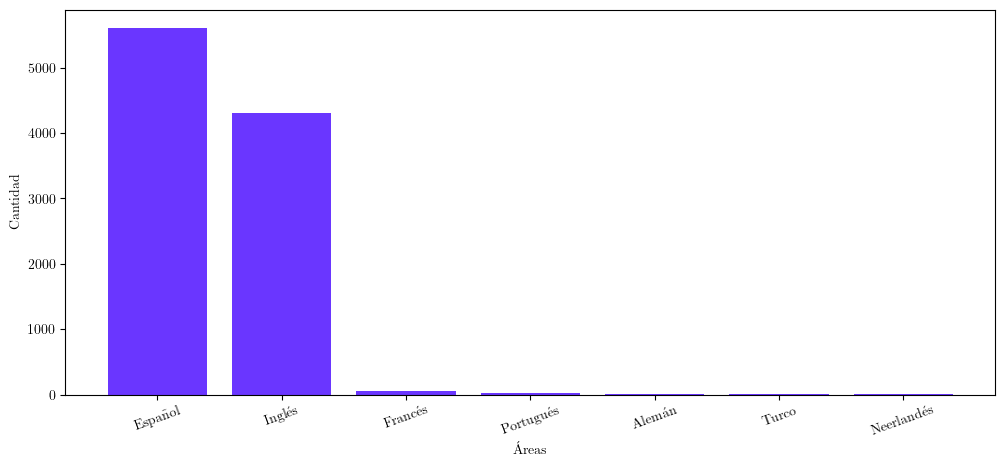

In [50]:
data_vacantes["Idioma"].value_counts()

conteo_idioma = data_vacantes["Idioma"].value_counts()

# Crear gráfico de barras
fig, ax = plt.subplots(figsize=(12, 5))  # Ajusta el tamaño de la figura aquí
ax.bar(conteo_idioma.index, conteo_idioma.values, width=0.8, color="#6a36ff")  # Puedes ajustar el valor de width según necesites


plt.xlabel("Áreas")
plt.ylabel("Cantidad")
plt.xticks(rotation=20)
plt.savefig("histograma_idioma.png", dpi=300, transparent=True)


## Análisis de Word Embedding

In [51]:
stop_words = set(stopwords.words(['english', 'spanish']))

def clean_text(text):
    text = re.sub(r'\([^)]*\)', '', text)  
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.replace('\n', ' ')
    text = text.lower().strip()
    return  text

def remove_stopwords(text):
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if not word in stop_words]
    return " ".join(filtered_text)


data_vacantes["nombre vacante"] = data_vacantes["nombre vacante"].apply(clean_text)
data_vacantes["nombre vacante"] = data_vacantes["nombre vacante"].apply(remove_stopwords)

data_emb = [vacante.split() for vacante in data_vacantes["nombre vacante"]]

model = Word2Vec(sentences=data_emb, vector_size=100, window=5, min_count=1, workers=4)
model.save("hunty_1.model")

In [52]:
model = Word2Vec.load("hunty_1.model")

def find_vacancies(word):
    similar_words = model.wv.most_similar(word, topn=10)
    similar_words = [word[0] for word in similar_words]
    matching_vacancies = data_vacantes[data_vacantes["nombre vacante"].str.contains('|'.join(similar_words))]
    return matching_vacancies[["pais", "remoto", "nombre vacante", "descripcion"]]

# Find and print vacancies related to "marketing"
print(find_vacancies("gerente").head(10))

# similar_vacancies = model.wv.most_similar("marketing", topn=10)
# print(similar_vacancies)


        pais  remoto                                     nombre vacante  \
1     MEXICO   False                   coordinador marketing publicidad   
4   COLOMBIA   False  asesor comercial experiencia ventas calzado ro...   
20  COLOMBIA   False              profesional compras comercio exterior   
25       NaN   False                              coordinador comercial   
29  COLOMBIA   False                      profesional marketing digital   
32    MEXICO   False                                    analista nminas   
36    MEXICO   False                               analista back office   
41  COLOMBIA   False  asesor tecnologiaasesor comercial bogota contr...   
42  COLOMBIA   False  gran convocatoria auxiliar enfermeria administ...   
44  COLOMBIA   False  vendedor externo experiencia pinturas ferreterias   

                                          descripcion  
1   empresa enfocada en esttica mdica y dermatolog...  
4   tienda de marca deportiva numero  a nivel mund...  
20  ma

Ahora se crean las imágenes para visualziar de manera más facil lo que es el word Embedding

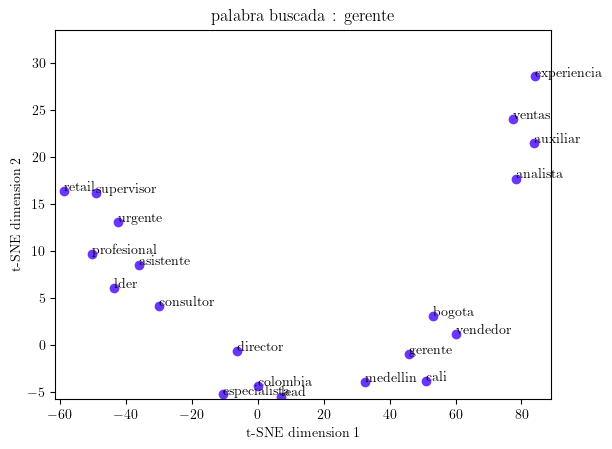

In [53]:
def display_closestwords_tsnescatterplot(model, word):
    arr = np.empty((0,100), dtype='f')
    word_labels = [word]

    close_words = model.wv.most_similar(word, topn=25)
    arr = np.append(arr, np.array([model.wv[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model.wv[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    tsne = TSNE(n_components=2, random_state=0, perplexity=5)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    plt.scatter(x_coords, y_coords, color="#6a36ff")

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.title(f"palabra buscada : {word}")
    plt.xlim(x_coords.min()+ 5, x_coords.max()+ 5)
    plt.ylim(y_coords.min()+ 5, y_coords.max()+ 5)
    plt.xlabel("t-SNE dimension 1")
    plt.ylabel("t-SNE dimension 2")
    plt.show()

display_closestwords_tsnescatterplot(model, 'gerente')
# display_closestwords_tsnescatterplot(model, 'ventas')

# Análisis de los tokens

Para poder trabajar con modelos de lenguaje natural se hace pertinente saber información acerca de los tokens que tiene cada una de las variables que se van a utilizar

In [3]:
data_vacancies["tokens nombre vacante"] =  data_vacancies["nombre vacante"].apply(count_tokens)
data_vacancies["tokens descripcion"] =  data_vacancies["descripcion"].apply(count_tokens)

data_users["tokens nombre cargo deseado"] = data_users["nombre cargo deseado"].apply(count_tokens)
data_users["tokens habilidades"] = data_users["habilidades"].apply(count_tokens)

### Vacantes

 Estadísticas de la descripcion
tokens Mínimos: 6
tokens Máximos: 7459
tokens promedio: 591.6355140186915
desviacion promedio: 430.0346251619769
Mediana tokens: 492.0


/Users/johan/anaconda3/envs/hunty/lib/python3.9/site-packages/seaborn/_oldcore.py:1592: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


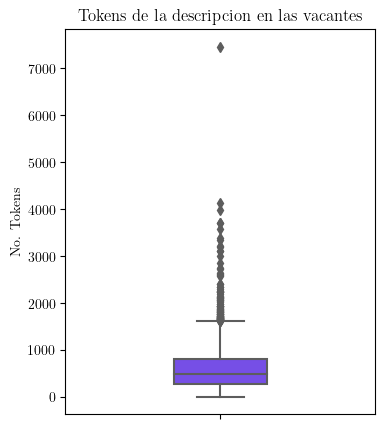


 Estadísticas nombre de la vacante
tokens Mínimos: 1
tokens Máximos: 51
tokens promedio: 9.018068535825545
desviacion promedio: 6.016032934749839
Mediana tokens: 8.0


/Users/johan/anaconda3/envs/hunty/lib/python3.9/site-packages/seaborn/_oldcore.py:1592: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


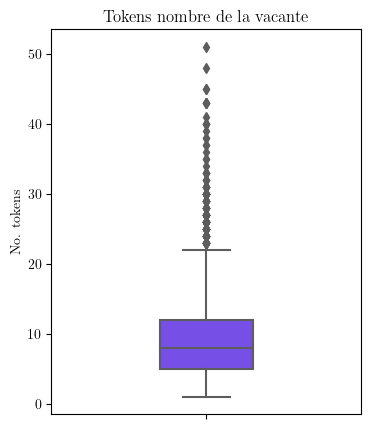

In [4]:
min_tokens = data_vacancies["tokens descripcion"].min()
max_tokens = data_vacancies["tokens descripcion"].max()
mean_tokens = data_vacancies["tokens descripcion"].mean()
std_tokens = data_vacancies["tokens descripcion"].std()
median_tokens = data_vacancies["tokens descripcion"].median()

print(" Estadísticas de la descripcion")
print(f"tokens Mínimos: {min_tokens}")
print(f"tokens Máximos: {max_tokens}")
print(f"tokens promedio: {mean_tokens}")
print(f"desviacion promedio: {std_tokens}")
print(f"Mediana tokens: {median_tokens}")

plt.figure(figsize=(4,5))
sns.boxplot(y='tokens descripcion',orient="h", data=data_vacancies,color="#6a36ff", width=0.3)
plt.title('Tokens de la descripcion en las vacantes')
# plt.xlabel('Idioma')
plt.ylabel('No. Tokens')
# plt.xticks(rotation=90)
# plt.savefig("salario_idioma.png", dpi=300, transparent=True)
plt.show()

print("")
min_tokens = data_vacancies["tokens nombre vacante"].min()
max_tokens = data_vacancies["tokens nombre vacante"].max()
mean_tokens = data_vacancies["tokens nombre vacante"].mean()
std_tokens = data_vacancies["tokens nombre vacante"].std()
median_tokens = data_vacancies["tokens nombre vacante"].median()

print(" Estadísticas nombre de la vacante")
print(f"tokens Mínimos: {min_tokens}")
print(f"tokens Máximos: {max_tokens}")
print(f"tokens promedio: {mean_tokens}")
print(f"desviacion promedio: {std_tokens}")
print(f"Mediana tokens: {median_tokens}")

plt.figure(figsize=(4,5))
sns.boxplot(y='tokens nombre vacante',orient="h", data=data_vacancies,color="#6a36ff", width=0.3)
plt.title('Tokens nombre de la vacante')
# plt.xlabel('Idioma')
plt.ylabel('No. tokens')
# plt.xticks(rotation=90)
# plt.savefig("salario_idioma.png", dpi=300, transparent=True)
plt.show()

### Usuarios

 Estadísticas nombre cargo deseado
tokens Mínimos: 4
tokens Máximos: 148
tokens promedio: 43.0597519729425
desviacion promedio: 21.209048527498826
Mediana tokens: 41.0


/Users/johan/anaconda3/envs/hunty/lib/python3.9/site-packages/seaborn/_oldcore.py:1592: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


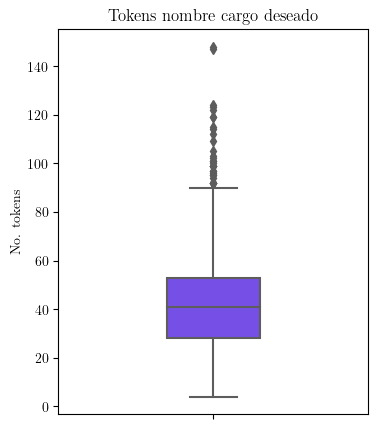


 Estadísticas habilidades
tokens Mínimos: 3
tokens Máximos: 441
tokens promedio: 69.79594137542277
desviacion promedio: 29.9687584767478
Mediana tokens: 71.0


/Users/johan/anaconda3/envs/hunty/lib/python3.9/site-packages/seaborn/_oldcore.py:1592: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


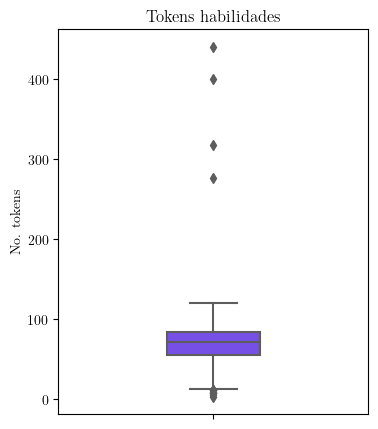

In [5]:
min_tokens = data_users["tokens nombre cargo deseado"].min()
max_tokens = data_users["tokens nombre cargo deseado"].max()
mean_tokens = data_users["tokens nombre cargo deseado"].mean()
std_tokens = data_users["tokens nombre cargo deseado"].std()
median_tokens = data_users["tokens nombre cargo deseado"].median()

print(" Estadísticas nombre cargo deseado")
print(f"tokens Mínimos: {min_tokens}")
print(f"tokens Máximos: {max_tokens}")
print(f"tokens promedio: {mean_tokens}")
print(f"desviacion promedio: {std_tokens}")
print(f"Mediana tokens: {median_tokens}")

plt.figure(figsize=(4,5))
sns.boxplot(y='tokens nombre cargo deseado',orient="h", data=data_users,color="#6a36ff", width=0.3)
plt.title('Tokens nombre cargo deseado')
# plt.xlabel('Idioma')
plt.ylabel('No. tokens')
# plt.xticks(rotation=90)
# plt.savefig("salario_idioma.png", dpi=300, transparent=True)
plt.show()
print("")
min_tokens = data_users["tokens habilidades"].min()
max_tokens = data_users["tokens habilidades"].max()
mean_tokens = data_users["tokens habilidades"].mean()
std_tokens = data_users["tokens habilidades"].std()
median_tokens = data_users["tokens habilidades"].median()

print(" Estadísticas habilidades")
print(f"tokens Mínimos: {min_tokens}")
print(f"tokens Máximos: {max_tokens}")
print(f"tokens promedio: {mean_tokens}")
print(f"desviacion promedio: {std_tokens}")
print(f"Mediana tokens: {median_tokens}")

plt.figure(figsize=(4,5))
sns.boxplot(y='tokens habilidades',orient="h", data=data_users,color="#6a36ff", width=0.3)
plt.title('Tokens habilidades')
# plt.xlabel('Idioma')
plt.ylabel('No. tokens')
# plt.xticks(rotation=90)
# plt.savefig("salario_idioma.png", dpi=300, transparent=True)
plt.show()

In [6]:
data_vacancies[data_vacancies["tokens descripcion"] > 1500]

,id trabajo,area,modalidad de trabajo,pais,ciudad,remoto,nombre vacante,descripcion,tokens nombre vacante,tokens descripcion
97,41431.0,Ventas Comercial,Tiempo completo,MEXICO,Ciudad de Mexico,False,head of sales b2b (relocation to madrid),"INTRO\n\n\n\n\nBridge for Billions, as one of ...",13,2228
159,50576.0,Mercadeo,Tiempo completo,MEXICO,Tampico,False,líder de portafolio institucional y soluciones...,"La disrupción es la nueva normalidad, y en el ...",18,1516
163,41397.0,Ventas Comercial,Tiempo completo,MEXICO,Monterrey,False,consultor hospitalario – monterrey n.l.,OBJETIVO DE LA POSICIÓN:\n\n\n\n\nGenerar e id...,13,2134
327,50326.0,Mercadeo,Tiempo completo,COLOMBIA,Bogota,False,communication & csr lead,"communications & csr lead\n\nelijo cuidarme, y...",5,1682
334,50027.0,Mercadeo,Tiempo completo,MEXICO,Guadalajara,True,strategy & planning – digital portfolio manager,about hp\n\nhp’s forward-looking strategy is c...,8,1743
...,...,...,...,...,...,...,...,...,...,...
9592,36583.0,Ventas Comercial,Tiempo completo,COLOMBIA,Bogota,False,senior customer service representative optum f...,"Cuánto más cambia el sistema de salud médica, ...",8,2623
9619,40227.0,Ventas Comercial,Tiempo completo,MEXICO,Ciudad de Mexico,False,jefe de ventas,jefe de ventas @cdmx\n\n\n\n\n¡atrévete a impa...,5,1561
9667,44502.0,Ventas Comercial,Tiempo completo,CANADA,Kitchener,True,"vp, head of gtm strategy",ceridian is a remote human capital management ...,7,1633
9908,56943.0,Mercadeo,Tiempo completo,MEXICO,Pachuca,False,teamleider marketing en communicatie,zo maak jij impact\n\n\n\n\nbinnen het team ma...,9,2568


## Análisis de las predicciones 

In [7]:
data_users[["id usuario", "idioma", "aspiracion salarial", "idioma", "años experiencia", "nombre cargo deseado", "habilidades"]]

,id usuario,idioma,idioma,aspiracion salarial,idioma,idioma,años experiencia,nombre cargo deseado,habilidades
153,154,INGLÉS B2 - INTERMEDIO ALTO,INGLÉS B2 - INTERMEDIO ALTO,3500000.0,INGLÉS B2 - INTERMEDIO ALTO,INGLÉS B2 - INTERMEDIO ALTO,5.0,"CUSTOMER EXPERIENCE, ESPECIALISTA EN CUSTOMER ...","SERVICE BLUEPRINT,CUSTOMER EFFORT,CUSTOMER JOU..."
155,156,INGLÉS B2 - INTERMEDIO ALTO,INGLÉS B2 - INTERMEDIO ALTO,5000000.0,INGLÉS B2 - INTERMEDIO ALTO,INGLÉS B2 - INTERMEDIO ALTO,3.0,"BUSINESS INTELLIGENCE, ANALISTA DE DATOS, BUSI...","PARABOLA,EXCEL ,POWER BI,SQL"
156,157,INGLÉS B2 - INTERMEDIO ALTO,INGLÉS B2 - INTERMEDIO ALTO,4000000.0,INGLÉS B2 - INTERMEDIO ALTO,INGLÉS B2 - INTERMEDIO ALTO,8.0,"DIRECTOR CREATIVO, EDITOR AUDIOVISUAL, CREATIV...","ILLUSTRATOR ,SPARK AR,PHOTOSHOP,AFTER EFFECTS"
158,159,INGLÉS C1 - AVANZADO,INGLÉS C1 - AVANZADO,4000000.0,INGLÉS C1 - AVANZADO,INGLÉS C1 - AVANZADO,1.0,"GROWTH ANALYST, GROWTH SPECIALIST, BUSINESS AN...","OFFICE ,EXCEL ,GOOGLE ANALYTICS,GOOGLE DATA S..."
159,160,INGLÉS B1 - INTERMEDIO,INGLÉS B1 - INTERMEDIO,2500000.0,INGLÉS B1 - INTERMEDIO,INGLÉS B1 - INTERMEDIO,0.0,"HRBP, ANALISTA DE BIENESTAR, ANALISTA DE CULTU...","BOLSAS DE EMPLEO,PRUEBAS PSICOTÉCNICAS ,MICROS..."
...,...,...,...,...,...,...,...,...,...
1214,1215,INGLÉS A1 - BÁSICO,INGLÉS A1 - BÁSICO,6500000.0,INGLÉS A1 - BÁSICO,INGLÉS A1 - BÁSICO,8.0,"COORDINADOR DE RECURSOS HUMANOS,COORDINADOR DE...","PHOTOSHOP,ADOBE ILLUSTRATOR,WORDPRESS,MICROSOF..."
1215,1216,INGLÉS A2 - PRE INTERMEDIO,INGLÉS A2 - PRE INTERMEDIO,4000000.0,INGLÉS A2 - PRE INTERMEDIO,INGLÉS A2 - PRE INTERMEDIO,7.0,"ESPECIALISTA RECURSOS HUMANOS,COORDINADOR DE T...","BIENESTAR,SELECCIÓN ,CONTRATACIÓN ,SG-SST,INDI..."
1216,1217,INGLÉS B1 - INTERMEDIO,INGLÉS B1 - INTERMEDIO,3000000.0,INGLÉS B1 - INTERMEDIO,INGLÉS B1 - INTERMEDIO,2.0,"ANALISTA DE GESTIÓN HUMANA,ANALISTA DE COMPENS...","COMPENSACIÓN Y BENEFICIOS,AFILIACIONES SEGURID..."
1217,1218,INGLÉS B1 - INTERMEDIO,INGLÉS B1 - INTERMEDIO,2200000.0,INGLÉS B1 - INTERMEDIO,INGLÉS B1 - INTERMEDIO,3.0,"ASISTENTE ADMINISTRATIVO,ANALISTA ADMINISTRATIVA","MICROSOFT EXCEL,BIZAGI"


In [39]:
data_users[data_users["id usuario"] == 163]["nombre cargo deseado"].values

array(['COORDINADOR DE RECURSOS HUMANOS,TALENT AQUISITION SPECIALIST, TALENT ADQUISITION, TALENT AND CULTURE BUSINESS PARTNER, GENERALISTA TALENTO HUMANO, LIDER TALENTO HUMANO, HRBP, HRBP JUNIOR, GENERALISTA DE RECURSOS HUMANOS, RECLUTADOR IT, RECLUTADOR BILINGUE'],
      dtype=object)

In [14]:
recomendatiosn = pd.read_csv("recomendations.csv")
recomendatiosn[recomendatiosn["id usuario"] == 154]

,id trabajo,nombre vacante,descripcion,id usuario
0,53382.0,category manager,"location: hanover, pa (logistic ctr), pennsylv...",154
1,39991.0,customer account manager (e),as the leading provider of open source databas...,154
2,56393.0,gestor de contenido,¿quieres ser parte de uno de los mejores ambie...,154
3,53500.0,"marketing manager, key account marketing","job overview\n\nthe marketing manager, key acc...",154
4,63852.0,generalista de recursos humanos,Esta vacante viene de la bolsa de empleo Talen...,154


In [33]:
data_score = pd.read_csv("recomendations_score.csv")
data_score[data_score["id usuario"]==163][["id trabajo","nombre vacante", "id usuario", "match score"]].sort_values(by="match score", ascending=False)

,id trabajo,nombre vacante,id usuario,match score
22,64002.0,analista de nóminas,163,0.862924
24,63852.0,generalista de recursos humanos,163,0.643947
23,53500.0,"marketing manager, key account marketing",163,0.619275
20,59059.0,seo manager,163,0.613536
21,41136.0,"sr brand specialist, consumer electronics",163,0.567940
